In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [3]:
pages=["https://www.athome.lu/en/rent/apartment/luxembourg"]
for page in range(2,66):
    pages.append("https://www.athome.lu/en/rent/apartment/luxembourg?page=" +str (page))
    
pages

['https://www.athome.lu/en/rent/apartment/luxembourg',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=2',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=3',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=4',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=5',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=6',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=7',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=8',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=9',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=10',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=11',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=12',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=13',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=14',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=15',
 'https://www.athome.lu/en/rent/apartment/luxembourg?page=16',
 'https:

In [7]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("link",{"itemprop":"url"}):
        links.append("https://www.athome.lu"+ resulthf.get("href"))

links


['https://www.athome.lu/en/rent/apartment/luxembourg/id-7871107.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7853893.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7846756.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7858803.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7740931.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7294488.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7846917.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7624682.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7708626.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7792811.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7869306.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7836169.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7826631.html',
 'https://www.athome.lu/en/rent/apartment/luxembourg/id-7861502.html',
 'http

In [8]:
len(links)

1300

In [48]:
ex=getAndParseURL("https://www.athome.lu/en/rent/apartment/luxembourg/id-6501932.html")

In [49]:
### Rent Price ###
ex.find("div",{"class":"KeyInfoBlockStyle__Price-sc-1o1h56e-5 fpNLMn"}).text.replace(",","").replace("€","").strip()

'3450'

In [50]:
### FOR DEPOSIT ###
ex.find("div",{"class":"feature-bloc"}).find(text=re.compile("deposit")).findNext().text.replace(",","").replace("€","").strip()

'NC'

In [51]:
### Add Expenses ###
ex.find("div",{"class":"feature-bloc"}).find(text=re.compile("charges")).findNext().text.replace(",","").replace("€","").strip()

'450'

In [60]:
### Comission ###
ex.find("div",{"class":"feature-bloc"}).find(text=re.compile("commission")).findNext().text[0:5].replace(",","").replace("€","").replace(".","").strip()

'4002'

In [52]:
### LOCATION ###
ex.find("h1",{"class":"KeyInfoBlockStyle__PdpTitle-sc-1o1h56e-2 ilPGib"}).text.strip()

'Apartment 3 bedrooms in Luxembourg-Limpertsberg  Ref 6501932'

In [53]:
### AREA OF FLAT ###
ex.find("i",{"class":"icon-surface"}).findNext().text.replace(" m²","").strip()

'135'

In [54]:
### BEDROOM ###
ex.find("i",{"class":"icon-bed"}).findNext().text.strip()

'3'

In [55]:
### BATHROOM ###
ex.find("i",{"class":"icon-bath"}).findNext().text.strip()

'2'

In [56]:
### carpark ###
ex.find("i",{"class":"icon-car"}).findNext().text.strip()

'1'

In [61]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("h1",{"class":"KeyInfoBlockStyle__PdpTitle-sc-1o1h56e-2 ilPGib"}).text.strip()
    except:
        location = np.nan
    try:
        rent = html.find("div",{"class":"KeyInfoBlockStyle__Price-sc-1o1h56e-5 fpNLMn"}).text.replace(",","").replace("€","").strip()
    except:
        rent = np.nan
    try:
        add_expenses = html.find("div",{"class":"feature-bloc"}).find(text=re.compile("charges")).findNext().text.replace(",","").replace("€","").strip()
    except:
        add_expenses = np.nan
    try:
        deposit = html.find("div",{"class":"feature-bloc"}).find(text=re.compile("deposit")).findNext().text.replace(",","").replace("€","").strip()
    except:
        deposit = np.nan
    try:
        commission = html.find("div",{"class":"feature-bloc"}).find(text=re.compile("commission")).findNext().text[0:5].replace(",","").replace("€","").replace(".","").strip()
    except:
        comission = np.nan
    try:
        bedroom = html.find("i",{"class":"icon-bed"}).findNext().text.strip()
    except:
        bedroom = np.nan
    try:
        bathroom = html.find("i",{"class":"icon-bath"}).findNext().text.strip()
    except:
        bathroom = np.nan
    try:
        net_area = html.find("i",{"class":"icon-surface"}).findNext().text.replace(" m²","").strip()
    except:
        net_area = np.nan
    try:
        car_park = html.find("i",{"class":"icon-car"}).findNext().text.strip()
    except:
        car_park = np.nan
    time.sleep(2)
    
    result.append([location,rent,add_expenses,deposit,commission,bedroom,bathroom,net_area,car_park])
    
columns=["Location","Rent","Add Expenses","Deposit","Commission","Bedroom","Bathroom","Net Area","Car Park"]
df = pd.DataFrame.from_records(result, columns=columns)

In [62]:
df.to_csv("lxmbrg.csv")

In [2]:
df=pd.read_csv("lxmbrg.csv")

In [3]:
df

,Unnamed: 0,Location,Rent,Add Expenses,Deposit,Commission,Bedroom,Bathroom,Net Area,Car Park
0,0,Flat in Luxembourg-Neudorf Ref 7871107,1450,NC,4350,1682,NaN,1.0,31.0,NaN
1,1,Apartment 2 bedrooms in Luxembourg-Centre vill...,2500,350,NC,1682,2.0,1.0,70.0,NaN
2,2,Flat in Luxembourg-Bonnevoie Ref 7846756,1500,NC,3000,870,NaN,1.0,20.0,NaN
3,3,Penthouse 2 bedrooms in Luxembourg-Dommeldange...,2850,280,8400,3306,2.0,1.0,95.0,2.0
4,4,Apartment 1 bedroom in Luxembourg-Centre ville...,2000,250,4000,2340,1.0,NaN,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,1295,Bedroom in Luxembourg-Centre ville Ref 7315748,1000,NC,500,2320,NaN,6.0,13.0,NaN
1296,1296,Bedroom in Luxembourg-Centre ville Ref 7315749,1000,NC,500,2320,NaN,6.0,13.0,NaN
1297,1297,Bedroom in Luxembourg-Centre ville Ref 7315746,1000,NC,500,2320,NaN,6.0,16.0,NaN
1298,1298,Bedroom in Luxembourg-Centre ville Ref 7315747,1000,NC,500,2320,NaN,6.0,16.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1300 non-null   int64  
 1   Location      1300 non-null   object 
 2   Rent          1300 non-null   int64  
 3   Add Expenses  1300 non-null   object 
 4   Deposit       1300 non-null   object 
 5   Commission    1300 non-null   object 
 6   Bedroom       424 non-null    float64
 7   Bathroom      1225 non-null   float64
 8   Net Area      1281 non-null   float64
 9   Car Park      241 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 101.7+ KB


In [11]:
df["Rent"].max()

7000

In [12]:
df["Rent"].min()

800

In [13]:
df["Rent"].unique()

array([1450, 2500, 1500, 2850, 2000, 1050, 1980, 3050, 3460, 3220, 1400,
       2350, 5200, 2240, 3800, 2170, 2950, 2600, 2300, 4700, 3450, 1950,
       4500, 2550, 1550, 1350, 1600, 1725, 2200, 1900, 3500, 1380, 1690,
       1800, 3900, 4950, 3000, 1750, 3200, 1875, 1650, 2100, 2700, 1200,
       2750, 1700, 2450, 2480, 3700, 4850, 3950, 2150, 2050, 4100, 2280,
       2250, 1150, 3400, 2040, 1490, 1390, 1100, 1525, 4160, 1475, 1300,
       1000,  900, 1280, 1250, 2295, 3895, 1995, 1480, 2800, 2400, 1850,
       1675, 4600, 4750, 2650, 4000, 7000, 4400,  850, 2490, 4240, 3300,
       3250, 3600, 2900, 2380, 5250,  800, 1340,  950, 3150, 3100, 3850,
       4350, 5000, 2760, 4550, 2430, 5800, 6900, 5400, 4900, 3190, 3140,
       3090, 1420, 1425, 4300, 3550, 6000, 1590, 3350, 1930,  835, 2810,
       2090, 1710, 2230, 1810, 2640, 1890,  975, 1090,  875,  825],
      dtype=int64)

In [10]:
df= df.loc[(df["Rent"] >= 800) & (df["Rent"] <= 20000),:]

In [14]:
df["Rent"].mean()

1587.4465558194775

In [15]:
df["Bedroom"].unique()

array([nan,  2.,  1.,  3.,  4.,  5., 13.])

In [25]:
df["Bedroom"]=df["Bedroom"].fillna("Studio")

C:\Users\User\AppData\Local\Temp\ipykernel_6800\4277441500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bedroom"]=df["Bedroom"].fillna("Studio")


In [26]:
df["Bedroom"].unique()

array(['Studio', 2.0, 1.0, 3.0, 4.0, 5.0, 13.0], dtype=object)

In [33]:
df["Deposit"].unique()

array(['4350', 3500, '3000', '8400', '4000', '1050', '3960', '6100',
       '3460', '3220', '7050', '6720', '2170', '8850', '7800', '6840',
       '6000', '4700', '5000', '9000', '5100', '4650', '8550', '4050',
       '4800', '2050', '3800', '7600', '4600', '3840', '5400', '12000',
       '3560', '11100', '6700', '3900', '7000', '2691', '6300', '8100',
       '5850', '1000', '4200', '9600', '1800', '2480', '2150', '1150',
       '2900', '2000', '1975', '1900', '1450', '1250', '1525', '6900',
       '13200', '1400', '2400', '2600', '3200', '900', '2560', '2500',
       '1100', '3895', '1995', '1950', '4500', '2700', '3400', '4440',
       '1675', '2800', '5340', '14700', '1200', '1380', '2025', '1350',
       '21600', '9660', '1700', '5560', '2300', '15750', '800', '950',
       '13650', '850', '6600', '6450', '11400', '2100', '500', '3500',
       '5700', '9450', '9300', '5800', '23550', '15000', '10560', '7440',
       '10200', '7980', '8280', '7830', '14925', '9750', '7500', '15',
  

In [32]:
df["Deposit"]=df["Deposit"].apply(lambda x : 3500 if x =="NC" else x)

C:\Users\User\AppData\Local\Temp\ipykernel_6800\3104146880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Deposit"]=df["Deposit"].apply(lambda x : 3500 if x =="NC" else x)


In [36]:
df["Deposit"]=df["Deposit"].astype(int)
df["Deposit"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_6800\2826559614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Deposit"]=df["Deposit"].astype(int)


2606.0380047505937

In [38]:
df["Bathroom"].unique()

array([ 1., nan,  2.,  3.,  4.,  5.,  7., 13.,  6.,  9., 47.])

In [39]:
df["Bathroom"]=df["Bathroom"].fillna(1)
df["Bathroom"]=df["Bathroom"].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_6800\1936629530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bathroom"]=df["Bathroom"].fillna(1)
C:\Users\User\AppData\Local\Temp\ipykernel_6800\1936629530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bathroom"]=df["Bathroom"].astype(int)


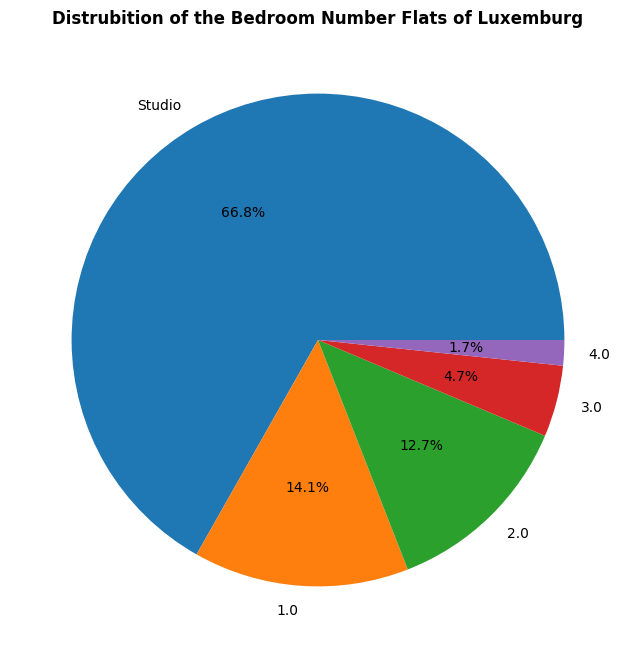

In [37]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Luxemburg',weight="bold")

# display the chart
plt.show();


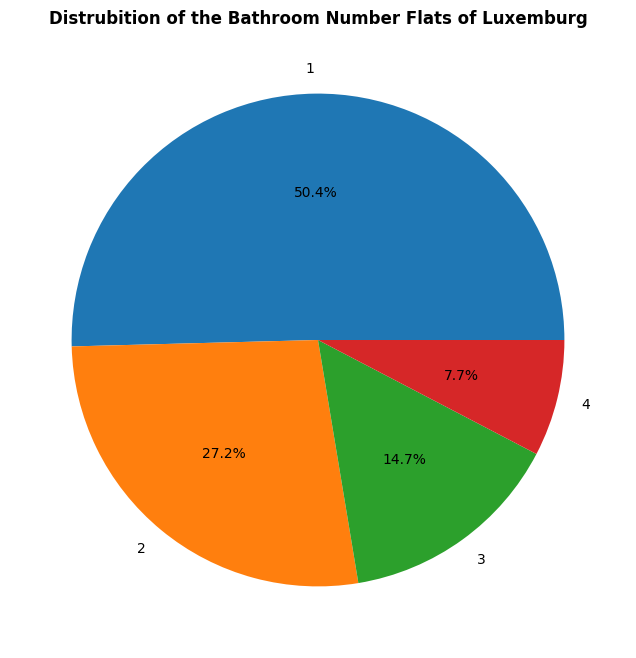

In [41]:
# get the value counts of the 'Bedroom' column
room_counts = df['Bathroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bathroom_counts = room_counts[room_counts/len(df) > 0.02]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bathroom_counts, labels=filtered_bathroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bathroom Number Flats of Luxemburg',weight="bold")

# display the chart
plt.show();


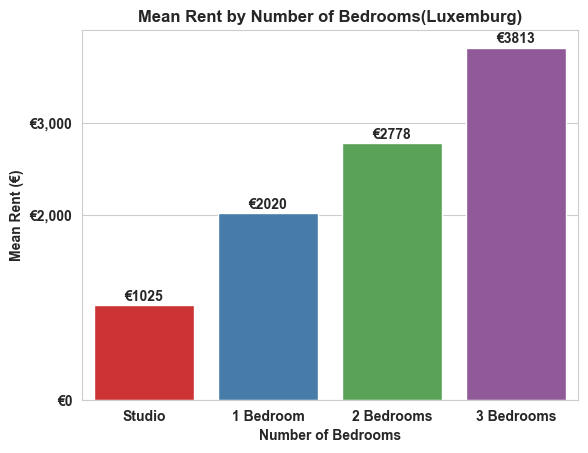

In [44]:
### Calculate mean rent for each group + add expenses ###
studio_mean_rent=df[df['Bedroom'] == "Studio"]['Rent'].mean()
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=["Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[studio_mean_rent,one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(["Studio",'1 Bedroom', '2 Bedrooms','3 Bedrooms',], weight='bold')
ax.set_yticks([0, 2000, 3000])
ax.set_yticklabels(['€0', '€2,000', '€3,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Luxemburg)', weight='bold')

plt.show();